[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  77  79  80  82
  83  85  86  88  89  91  93  94  96  97  99 100 102 103 105 106 108 110
 111 113 114 116 117 119 120 122 124 125 127 128 130 131 133 134 136 137
 139 141 142 144 145 147 148 150 151 153 155 156 158 159 161 162 164 165
 167 168 170 172 173 175 176 178 179 181 182 184 186 187 189 190 192 193
 195 196 198 199 201 203 204 206 207 209 210 212 213 215 217 218 220 221
 223 224 226 227 229 230 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

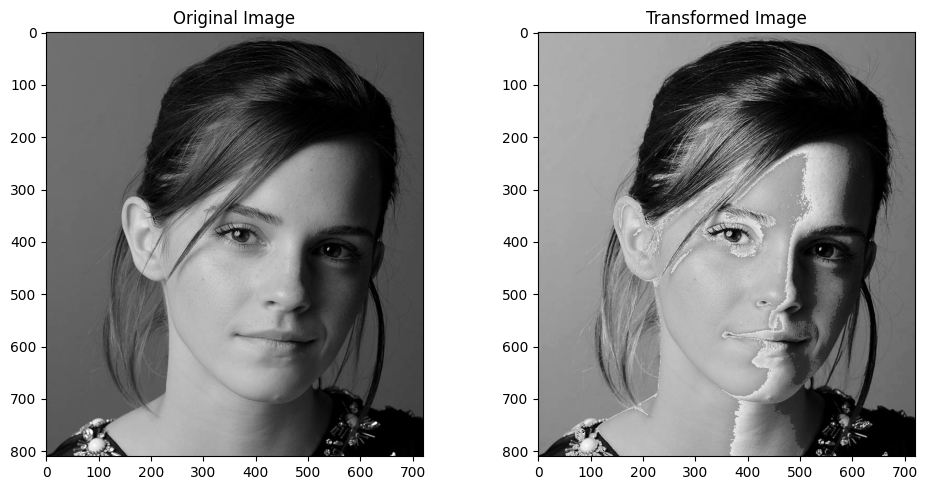

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_transform(image, breakpoints, slopes):
    
    # Create a lookup table for the transformation
    lookup_table = np.zeros(256, dtype=np.uint8)
   #print(lookup_table)
    
    for i in range(len(breakpoints) - 1):
        start, end = breakpoints[i], breakpoints[i+1]
        slope = slopes[i]
        lookup_table[start:end] = np.clip(np.arange(start, end) * slope, 0, 255)
    
    # Apply the transformation using the lookup table
    transformed_image = cv2.LUT(image, lookup_table)
    print(lookup_table)
    return transformed_image

# Load an example image
image_path = "emma.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the piecewise transformation parameters
breakpoints = [0, 50, 150, 255]
slopes = [1, 1.55, 1]

# Apply the piecewise linear transformation
transformed_image = piecewise_linear_transform(original_image, breakpoints, slopes)

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")

plt.tight_layout()
plt.show()

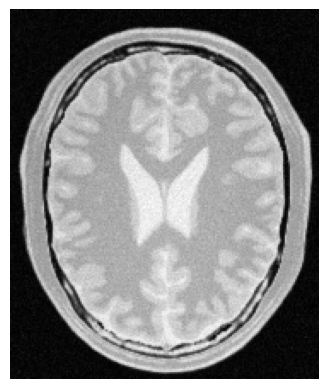

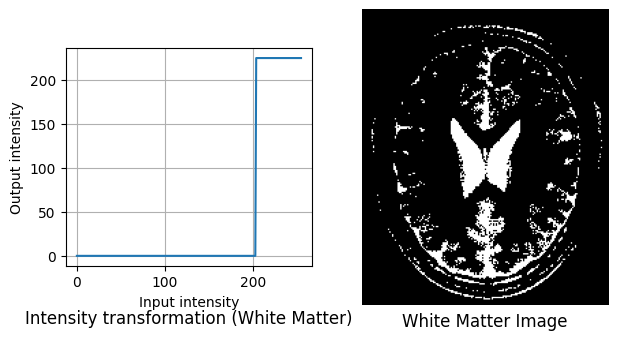

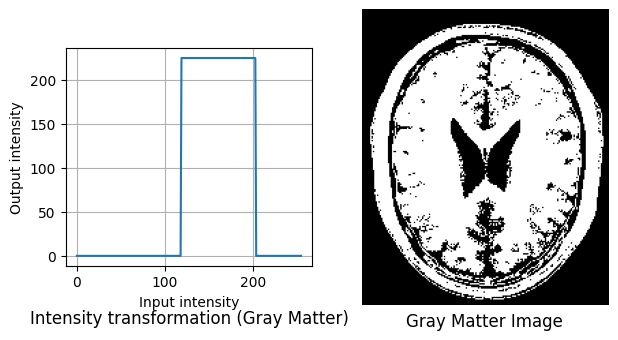

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Import the image in grayscale mode
img = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)

# Create a figure and axis for displaying the image
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.axis("off")

# Create arrays for white and gray matter lookup tables
w_array1 = np.linspace(0,0, 204)   # white range 0-204
w_array2 = np.linspace(225, 225, 52)  # white range 225-255
g_array1 = np.linspace(0, 0, 119)   # gray range 0-119
g_array2 = np.linspace(225, 225, 85)  # gray range 225-255
g_array3 = np.linspace(0, 0, 52)    # gray range 0-52

# Concatenate the arrays and convert to uint8 data type
array_w = np.concatenate((w_array1, w_array2)).astype(np.uint8)  # white matter lookup table
array_g = np.concatenate((g_array1, g_array2, g_array3)).astype(np.uint8)  # gray matter lookup table

# Apply the lookup tables to the image
imgW = cv.LUT(img, array_w)  # Apply white matter lookup table
imgG = cv.LUT(img, array_g)  # Apply gray matter lookup table

# Create subplots for plotting intensity transformations and results
fig, ax = plt.subplots(1, 2, figsize=(7, 7))

# Plot intensity transformation for white matter
ax[0].plot(array_w)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation (White Matter)", y=-0.3)

# Display the processed white matter image
ax[1].imshow(imgW, cmap='gray')
ax[1].axis("off")
ax[1].set_title("White Matter Image", y=-0.1)

# Show the plots
plt.show()

# Create subplots for plotting intensity transformations and results for gray matter
fig, ax = plt.subplots(1, 2, figsize=(7, 7))

# Plot intensity transformation for gray matter
ax[0].plot(array_g)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation (Gray Matter)", y=-0.3)

# Display the processed gray matter image
ax[1].imshow(imgG, cmap='gray')
ax[1].axis("off")
ax[1].set_title("Gray Matter Image", y=-0.1)

# Show the plots
plt.show()



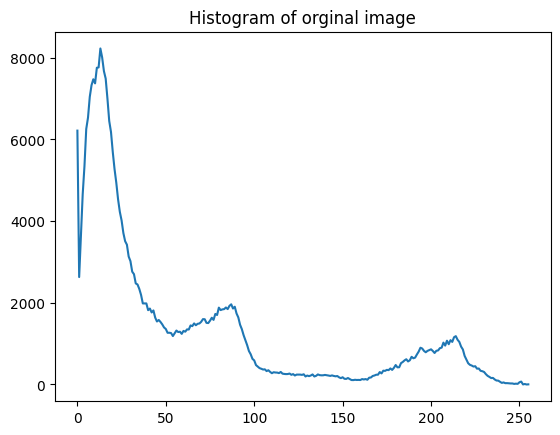

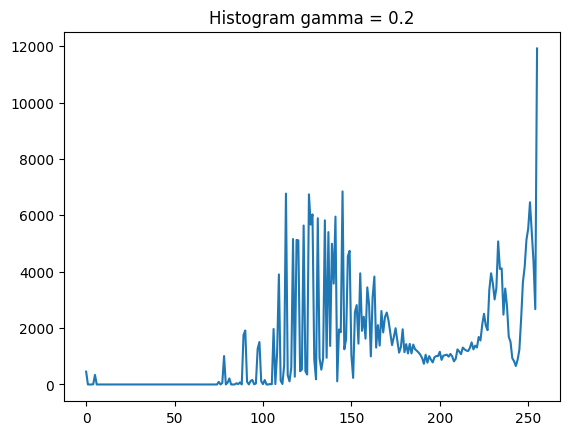

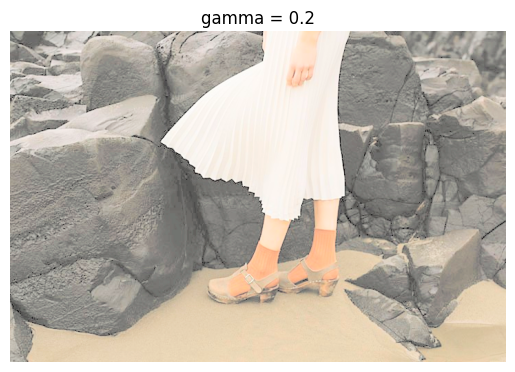

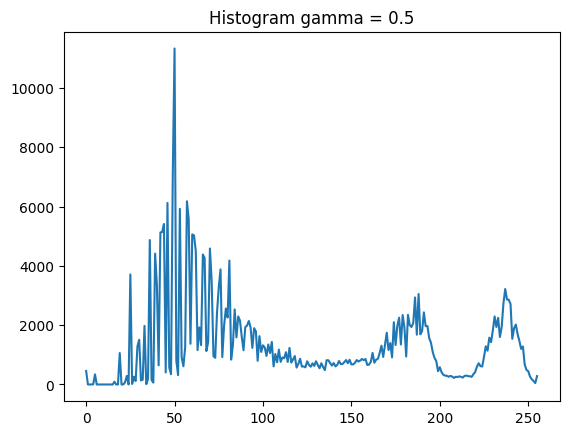

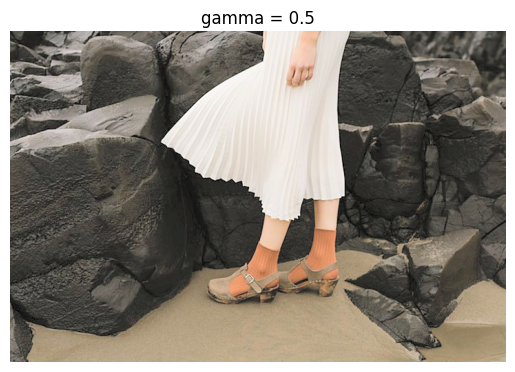

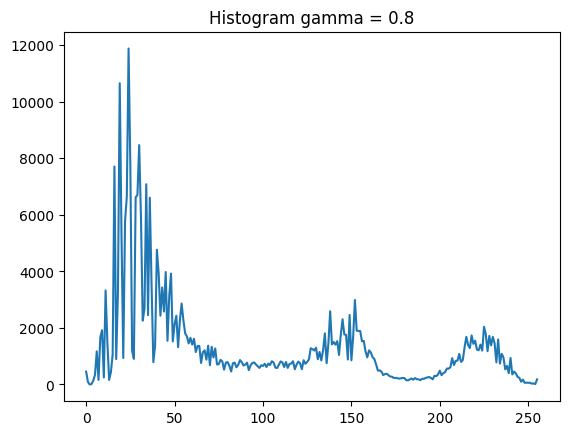

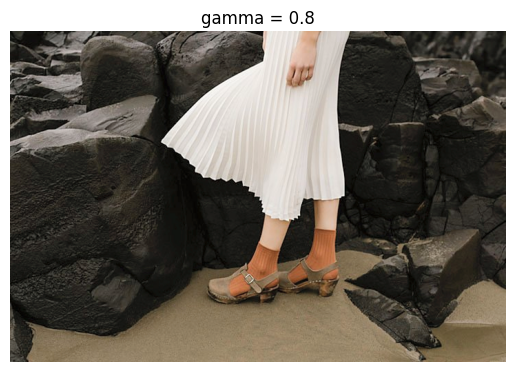

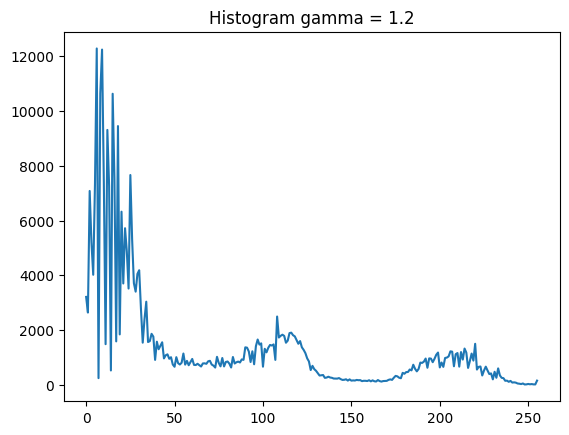

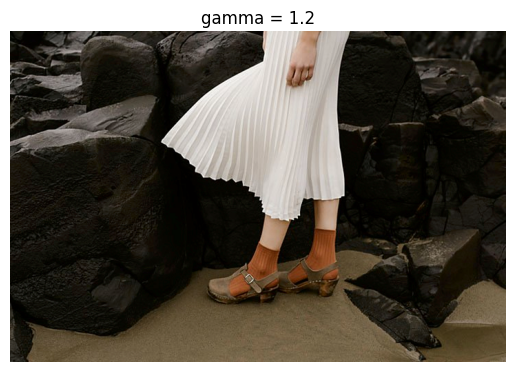

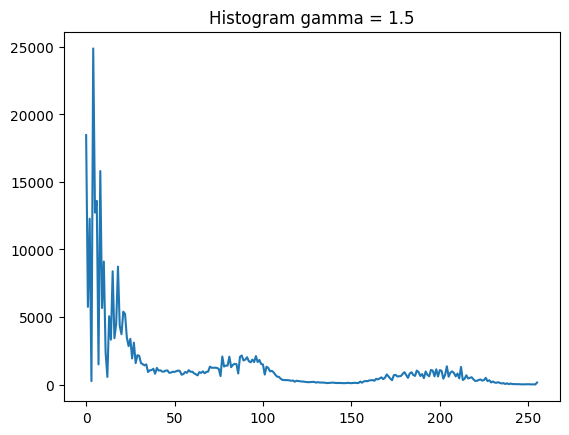

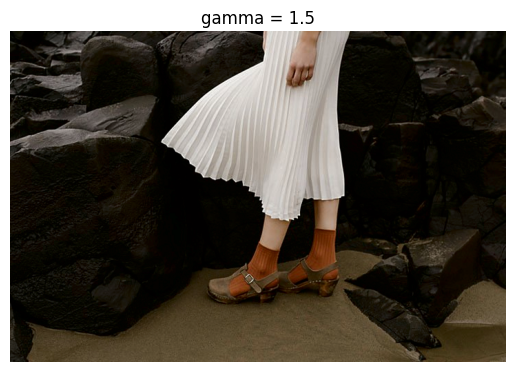

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
#plot histogram of original image
img_hist = cv.calcHist([img],[0],None,[256],[0,256])
f,a = plt.subplots()
plt.title("Histogram of orginal image")
a.plot(img_hist)
plt.show()
#convert image to Lab color space
img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(img)


gammaLst = [0.2,0.5,0.8,1.2,1.5]
for gamma in gammaLst:
    #add gamma correction
    t_L = np.array([(p/255.0)**gamma*255 for p in L]).astype(np.uint8)
    img2= cv.merge([t_L,a,b])
    img2=cv.cvtColor(img2,cv.COLOR_Lab2RGB)
    #ploting histograms
    fig,ax = plt.subplots()
    img_hist = cv.calcHist([img2],[0],None,[256],[0,256])
    ax.plot(img_hist)
    plt.title("Histogram gamma = "+str(gamma))
    plt.show()
    fig,ax = plt.subplots()
    ax.imshow(img2)
    plt.title("gamma = "+str(gamma))
    ax.axis("off")
    plt.show()

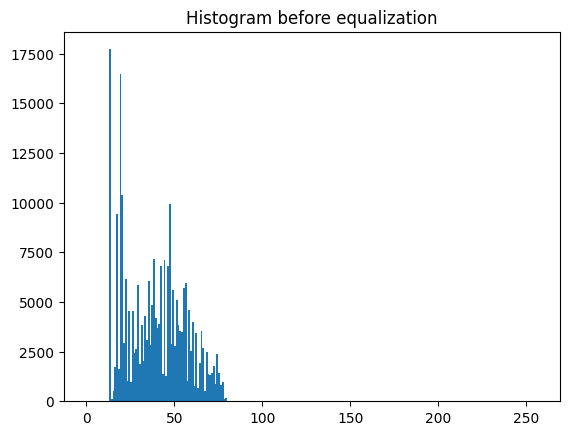

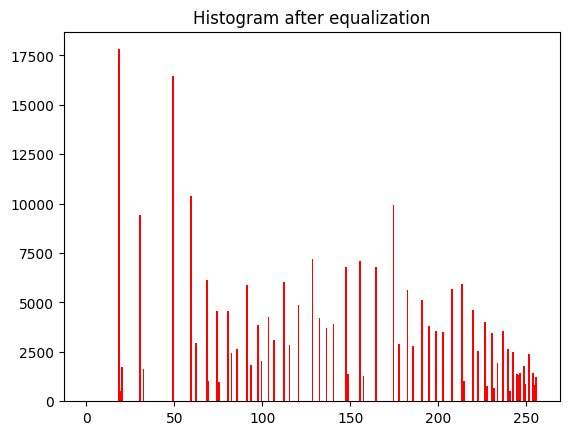

(-0.5, 999.5, 499.5, -0.5)

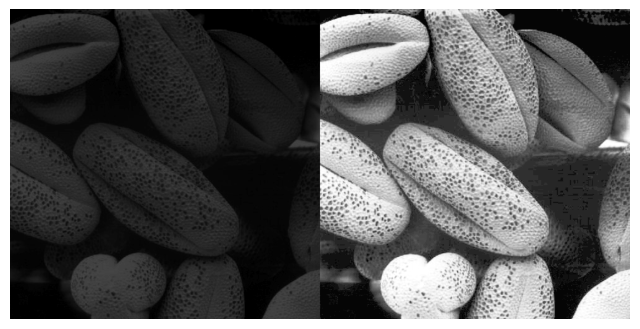

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#equalization funtion
def equalization(img):
    L=256
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    cdf=hist.cumsum() #calculate cdf
    eqcHist = np.round((L-1)*cdf/cdf.max()) #normalized between 0-255
    return cv.LUT(img,eqcHist) #mapping

#load image
img =cv.imread("shells.tif",cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(),256,[0,256])
plt.title("Histogram before equalization")
plt.show()

#equalization
img2 = equalization(img)

#plot
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.title("Histogram after equalization")
plt.show()


fig,ax=plt.subplots(1,1,figsize=(8,8))
pkc = np.hstack((img,img2))
ax.imshow(pkc,cmap='gray')
plt.axis('off')